In [41]:
import numpy as np
import pandas as pd
import ppscore as pps
import matplotlib.pyplot as plt

In [4]:
%%time
df = pd.read_csv("../data/interim/seggregated/delinquency.csv")
labels = pd.read_csv("../data/raw/train_labels.csv")

CPU times: user 39.2 s, sys: 27.1 s, total: 1min 6s
Wall time: 1min 11s


In [5]:
%%time
# checking shape of the dataframe
df.shape, labels.shape

CPU times: user 26 µs, sys: 19 µs, total: 45 µs
Wall time: 563 µs


((5531451, 97), (458913, 2))

In [6]:
%%time
df.columns

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 8.82 µs


Index(['customer_ID', 'D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46',
       'D_47', 'D_48', 'D_49', 'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55',
       'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_63', 'D_64', 'D_65',
       'D_66', 'D_68', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_74', 'D_75',
       'D_76', 'D_77', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84',
       'D_86', 'D_87', 'D_88', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96',
       'D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'D_108', 'D_109',
       'D_110', 'D_111', 'D_112', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117',
       'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125',
       'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_132', 'D_133',
       'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141',
       'D_142', 'D_143', 'D_144', 'D_145'],
      dtype='object')

In [7]:
%%time
labels.columns

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 7.63 µs


Index(['customer_ID', 'target'], dtype='object')

In [8]:
%%time
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB
CPU times: user 47.8 ms, sys: 8.12 ms, total: 55.9 ms
Wall time: 120 ms


In [9]:
%%time
# Let's encode customer_ID for efficient memory management.
labels['encoded_customerID'] = range(0, len(labels))

CPU times: user 1.51 ms, sys: 714 µs, total: 2.22 ms
Wall time: 4.21 ms


In [10]:
%%time
labels.head()

CPU times: user 102 µs, sys: 73 µs, total: 175 µs
Wall time: 894 µs


,customer_ID,target,encoded_customerID
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,1
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,2
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,3
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,4


In [11]:
%%time
custid_mapper = labels[['customer_ID', 'encoded_customerID']].set_index('customer_ID').to_dict()
custid_mapper = custid_mapper['encoded_customerID']

CPU times: user 266 ms, sys: 48.3 ms, total: 315 ms
Wall time: 448 ms


In [12]:
%%time
df['encoded_customerID'] = df['customer_ID'].map(custid_mapper)
df = df.drop(['customer_ID'], axis=1)

CPU times: user 1.09 s, sys: 2.27 s, total: 3.36 s
Wall time: 4.16 s


In [13]:
%%time
res_df = pd.merge(df, labels[['encoded_customerID', 'target']], on='encoded_customerID', how='left')

CPU times: user 1.86 s, sys: 7.6 s, total: 9.46 s
Wall time: 12.6 s


In [14]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 97 columns):
 #   Column              Dtype  
---  ------              -----  
 0   D_39                float64
 1   D_41                float64
 2   D_42                float64
 3   D_43                float64
 4   D_44                float64
 5   D_45                float64
 6   D_46                float64
 7   D_47                float64
 8   D_48                float64
 9   D_49                float64
 10  D_50                float64
 11  D_51                float64
 12  D_52                float64
 13  D_53                float64
 14  D_54                float64
 15  D_55                float64
 16  D_56                float64
 17  D_58                float64
 18  D_59                float64
 19  D_60                float64
 20  D_61                float64
 21  D_62                float64
 22  D_63                object 
 23  D_64                object 
 24  D_65                floa

In [15]:
%%time
res_df['encoded_customerID'].duplicated().sum()

CPU times: user 30.1 ms, sys: 19.5 ms, total: 49.6 ms
Wall time: 220 ms


5072538

We found that, most of the customer ids are duplicated. That's might be for data generation. Like Oversampling the data, they have duplicated. Need to find other values are same as well. We can check with some samples. By taking random 5 customer id we can check or we can sort the dataframe by customerID.

Our assumption is false proved by the below dataframe. These duplicate values are generated while over sampling the data. We need not to worry about them. We need to merge the target variable with the independent variables.

In [16]:
%%time
df2 = res_df.sort_values('encoded_customerID')
df2.head()

CPU times: user 1.17 s, sys: 1.28 s, total: 2.45 s
Wall time: 4.27 s


,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,encoded_customerID,target
0,0.001733,0.008771,NaN,NaN,0.000630,0.708906,0.358587,0.525351,0.255736,NaN,...,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0,0
12,0.009119,0.001604,NaN,NaN,0.003258,0.740102,0.420521,0.539715,0.192376,NaN,...,NaN,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533,0,0
11,0.002425,0.006174,NaN,NaN,0.005109,0.740062,0.425848,0.538275,0.237232,NaN,...,NaN,0.001563,0.001976,0.002569,NaN,0.001098,0.006346,0.004204,0,0
10,0.005715,0.001853,NaN,NaN,0.002389,0.730121,0.503054,0.537921,0.325718,NaN,...,NaN,0.000427,0.004594,0.003613,NaN,0.007568,0.003004,0.006362,0,0
8,0.009896,0.002519,NaN,NaN,0.002578,0.730918,0.430077,0.539065,0.189361,NaN,...,NaN,0.009742,0.003968,0.007945,NaN,0.008722,0.004369,0.000995,0,0


In [17]:
%%time
# Column Profiling: data type, null percentage, describe (min, max, [5,25,50,75,95], mean, std, variance)

def col_profiling(col_series):
    res_dict = {'datatype': col_series.dtype,
                'null_pct': col_series.isna().sum()*100/len(col_series),
                'min_val': col_series.min(),
                'max_val': col_series.max(),
                'mean_val': col_series.mean(),
                'std': col_series.std(),
                'variance': col_series.std(),
                '5_pct': col_series.quantile(q=0.05),
                '25_pct': col_series.quantile(q=0.25),
                '50_pct': col_series.quantile(q=0.5),
                '75_pct': col_series.quantile(q=0.75),
                '95_pct': col_series.quantile(q=0.95),
                'pct_uniq': col_series.nunique() / len(col_series),
                'num_unique': col_series.nunique()}
    return res_dict

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


In [18]:
%%time
# Column Profiling on delinquency variables
ls = []
for item in res_df:
    if res_df[item].dtype == np.float64 or res_df[item].dtype == np.int64:
        res = col_profiling(res_df[item])
        res['column_name'] = item
        ls.append(res)
    else:
        print(f"categorical column is {item}")

categorical column is D_63
categorical column is D_64
CPU times: user 2min 17s, sys: 629 ms, total: 2min 18s
Wall time: 2min 23s


In [19]:
%%time
col_profile_df = pd.DataFrame(ls).set_index('column_name')

CPU times: user 8.52 ms, sys: 115 µs, total: 8.64 ms
Wall time: 22.6 ms


In [35]:
%%time
col_profile_df = col_profile_df.reset_index()
col_profile_df

CPU times: user 2.58 ms, sys: 713 µs, total: 3.29 ms
Wall time: 2.82 ms


,column_name,datatype,null_pct,min_val,max_val,mean_val,std,variance,5_pct,25_pct,50_pct,75_pct,95_pct,pct_uniq,num_unique
0,D_39,float64,0.000000,5.026190e-09,5.389619,0.153117,0.270071,0.270071,0.000907,0.004528,0.009057,0.236641,0.653379,1.000000e+00,5531451
1,D_41,float64,0.036446,5.566545e-10,8.988807,0.059785,0.202544,0.202544,0.000576,0.002873,0.005747,0.008616,0.381905,9.996355e-01,5529435
2,D_42,float64,85.694278,-4.543303e-04,4.191119,0.184974,0.228185,0.228185,0.006846,0.037516,0.120519,0.250869,0.575941,1.430572e-01,791314
3,D_43,float64,29.981211,1.154550e-07,10.111619,0.154684,0.213398,0.213398,0.009686,0.042275,0.088512,0.184321,0.513366,7.001879e-01,3873055
4,D_44,float64,4.959259,5.153088e-10,5.634724,0.118443,0.221303,0.221303,0.000768,0.003833,0.007668,0.131948,0.625863,9.504074e-01,5257132
5,D_45,float64,0.036464,1.563241e-08,1.610002,0.252187,0.242683,0.242683,0.012752,0.054629,0.180805,0.373322,0.770337,9.996354e-01,5529434
6,D_46,float64,21.905627,-1.728934e+01,16.319901,0.475478,0.169893,0.169893,0.284222,0.425128,0.459670,0.517407,0.712603,7.809437e-01,4319752
7,D_47,float64,0.000000,-2.662164e-02,1.643096,0.407109,0.234799,0.234799,0.052701,0.232351,0.383166,0.561549,0.841013,1.000000e+00,5531451
8,D_48,float64,12.993426,-9.615277e-03,8.971425,0.381625,0.326479,0.326479,0.013054,0.081007,0.286172,0.669366,0.940894,8.700657e-01,4812726
9,D_49,float64,90.137597,5.021298e-07,45.840118,0.191925,0.278391,0.278391,0.017031,0.061584,0.130368,0.246764,0.553478,9.862403e-02,545534


What are some columns, I will not consider for analysis:

1. All unique: In my opinion these are kind of unique Ids.
2. All same: These are constants
3. Pseudo constants: These are kind of constants, if we are getting more than 95% same value.
4. All null: Empty columns
5. cols with most of the values are nulls (we can take 95% as cut off)

In [21]:
%%time
all_uniq = col_profile_df[col_profile_df['pct_uniq']==1].index.tolist()

CPU times: user 0 ns, sys: 1.3 ms, total: 1.3 ms
Wall time: 4.5 ms


In [22]:
%%time
all_uniq_df = df[all_uniq+['encoded_customerID']]

CPU times: user 128 ms, sys: 1.76 s, total: 1.89 s
Wall time: 3.11 s


In [23]:
%%time
all_uniq_df.head()

CPU times: user 70 µs, sys: 16 µs, total: 86 µs
Wall time: 89.6 µs


,D_39,D_47,D_51,D_58,D_60,D_65,D_71,D_75,D_86,D_92,D_93,D_94,D_127,encoded_customerID
0,0.001733,0.525351,1.335856,0.158612,0.199617,0.007126,0.119403,0.069067,0.007084,1.006133,0.003569,0.008871,1.003319,0
1,0.005775,0.521311,1.339794,0.148459,0.151387,0.002413,0.140611,0.074166,0.006677,1.005791,0.000571,0.000391,1.008394,0
2,0.091505,0.524568,1.337179,0.139504,0.305883,0.001878,0.075868,0.076510,0.001185,1.005801,0.007425,0.009234,1.009307,0
3,0.002455,0.530929,1.339909,0.138100,0.273553,0.005899,0.150209,0.071547,0.003324,1.007036,0.000664,0.003200,1.001671,0
4,0.002483,0.529305,1.341735,0.126443,0.233103,0.009479,0.096441,0.074432,0.001504,1.002915,0.003079,0.003845,1.009886,0


In [24]:
# D_87 is constant columns

In [28]:
%%time
res_df['target'] = res_df['target'].astype('category')
lss = []
for item in res_df:
    if item in ['target', 'encoded_customerID']:
        continue
    else:
        lss.append(pps.score(res_df, item, 'target'))

CPU times: user 29.2 s, sys: 620 ms, total: 29.8 s
Wall time: 32.9 s


In [30]:
pps_score_result = pd.DataFrame(lss)

In [32]:
pd.set_option('display.max_rows', 100)
pps_score_result

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,D_39,target,3.338046e-02,classification,True,weighted F1,0.635595,0.647759,DecisionTreeClassifier()
1,D_41,target,3.612318e-02,classification,True,weighted F1,0.634252,0.647464,DecisionTreeClassifier()
2,D_42,target,2.377251e-01,classification,True,weighted F1,0.518000,0.632584,DecisionTreeClassifier()
3,D_43,target,8.413409e-02,classification,True,weighted F1,0.594334,0.628464,DecisionTreeClassifier()
4,D_44,target,2.694094e-01,classification,True,weighted F1,0.642049,0.738484,DecisionTreeClassifier()
5,D_45,target,9.531243e-02,classification,True,weighted F1,0.633984,0.668870,DecisionTreeClassifier()
6,D_46,target,7.654894e-02,classification,True,weighted F1,0.619535,0.648659,DecisionTreeClassifier()
7,D_47,target,3.203996e-02,classification,True,weighted F1,0.635595,0.647270,DecisionTreeClassifier()
8,D_48,target,2.924455e-01,classification,True,weighted F1,0.617935,0.729668,DecisionTreeClassifier()
9,D_49,target,5.065292e-02,classification,True,weighted F1,0.496400,0.521909,DecisionTreeClassifier()


In [36]:
col_profile_df = pd.merge(col_profile_df, pps_score_result[['x', 'ppscore', 'baseline_score', 'model_score']], left_on='column_name', right_on='x',
                          how='left')

In [38]:
col_profile_df['ppscore'] = np.round(col_profile_df['ppscore'], 2)

In [40]:
col_profile_df

,column_name,datatype,null_pct,min_val,max_val,mean_val,std,variance,5_pct,25_pct,50_pct,75_pct,95_pct,pct_uniq,num_unique,x,ppscore,baseline_score,model_score
0,D_39,float64,0.000000,5.026190e-09,5.389619,0.153117,0.270071,0.270071,0.000907,0.004528,0.009057,0.236641,0.653379,1.000000e+00,5531451,D_39,0.03,0.635595,0.647759
1,D_41,float64,0.036446,5.566545e-10,8.988807,0.059785,0.202544,0.202544,0.000576,0.002873,0.005747,0.008616,0.381905,9.996355e-01,5529435,D_41,0.04,0.634252,0.647464
2,D_42,float64,85.694278,-4.543303e-04,4.191119,0.184974,0.228185,0.228185,0.006846,0.037516,0.120519,0.250869,0.575941,1.430572e-01,791314,D_42,0.24,0.518000,0.632584
3,D_43,float64,29.981211,1.154550e-07,10.111619,0.154684,0.213398,0.213398,0.009686,0.042275,0.088512,0.184321,0.513366,7.001879e-01,3873055,D_43,0.08,0.594334,0.628464
4,D_44,float64,4.959259,5.153088e-10,5.634724,0.118443,0.221303,0.221303,0.000768,0.003833,0.007668,0.131948,0.625863,9.504074e-01,5257132,D_44,0.27,0.642049,0.738484
5,D_45,float64,0.036464,1.563241e-08,1.610002,0.252187,0.242683,0.242683,0.012752,0.054629,0.180805,0.373322,0.770337,9.996354e-01,5529434,D_45,0.10,0.633984,0.668870
6,D_46,float64,21.905627,-1.728934e+01,16.319901,0.475478,0.169893,0.169893,0.284222,0.425128,0.459670,0.517407,0.712603,7.809437e-01,4319752,D_46,0.08,0.619535,0.648659
7,D_47,float64,0.000000,-2.662164e-02,1.643096,0.407109,0.234799,0.234799,0.052701,0.232351,0.383166,0.561549,0.841013,1.000000e+00,5531451,D_47,0.03,0.635595,0.647270
8,D_48,float64,12.993426,-9.615277e-03,8.971425,0.381625,0.326479,0.326479,0.013054,0.081007,0.286172,0.669366,0.940894,8.700657e-01,4812726,D_48,0.29,0.617935,0.729668
9,D_49,float64,90.137597,5.021298e-07,45.840118,0.191925,0.278391,0.278391,0.017031,0.061584,0.130368,0.246764,0.553478,9.862403e-02,545534,D_49,0.05,0.496400,0.521909


Assumptions:

1. PPScore is the predictability score. We might not take any direct action from any indication of pps score. But we can relate it with other factors like null percentage, uniqueness percentage, and standard deviation
2. High null values should result low pps score, should plot scatter plot to visualize.
3. High uniqueness and constant should result low pps score. So plot scatter plot.
4. We should plot scatter plot between std, var and ppscore

<Axes: ylabel='Frequency'>

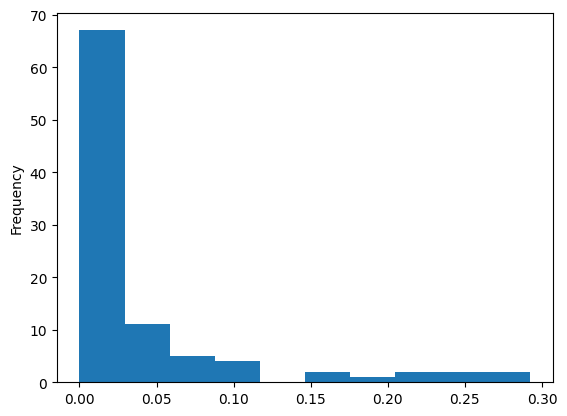

In [34]:
pps_score_result['ppscore'].plot(kind='hist')

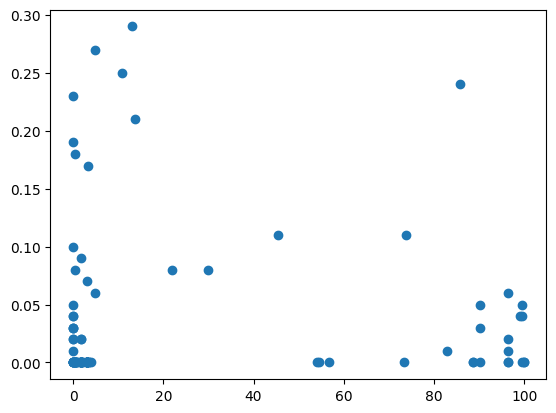

In [43]:
plt.scatter(col_profile_df['null_pct'], col_profile_df['ppscore'])
plt.show()

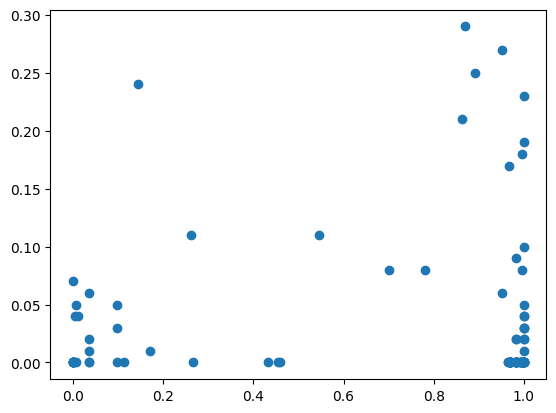

In [44]:
plt.scatter(col_profile_df['pct_uniq'], col_profile_df['ppscore'])
plt.show()

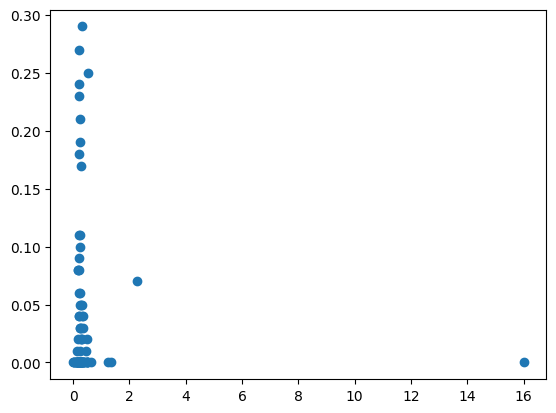

In [45]:
plt.scatter(col_profile_df['std'], col_profile_df['ppscore'])
plt.show()

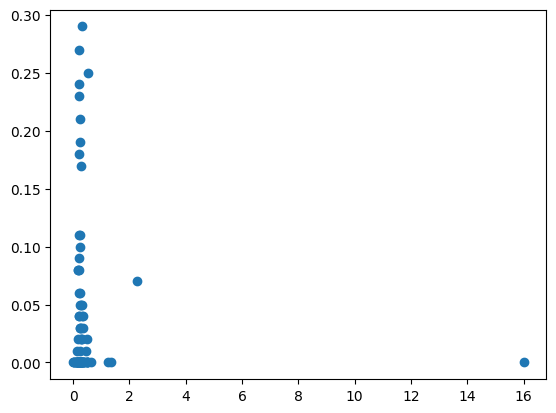

In [46]:
plt.scatter(col_profile_df['variance'], col_profile_df['ppscore'])
plt.show()

In [47]:
col_profile_df.to_csv("../data/metadata/column_profiling_delinquency.csv", index=False)